
Undirected Graph (20 Nodes)
Adjacency Matrix:
[[0. 1. 0. 1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 1. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 0.]]
Degree: [5. 4. 7. 7. 6. 5. 8. 7. 7. 4.]
Mean Path Length: 1.22
Clustering Coefficient: 0.7885714285714285
Transitivity: 0.325

Directed Graph (20 Nodes)
Adjacency Matrix:
[[0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 1. 0.]]
In-Degree: [6. 4. 3. 3. 6. 4. 4. 1. 4. 5.]
Out-Degree: [3. 4. 7. 4. 4. 3. 4. 2. 4. 5.]
Mean Path Length: 1.47
Clustering

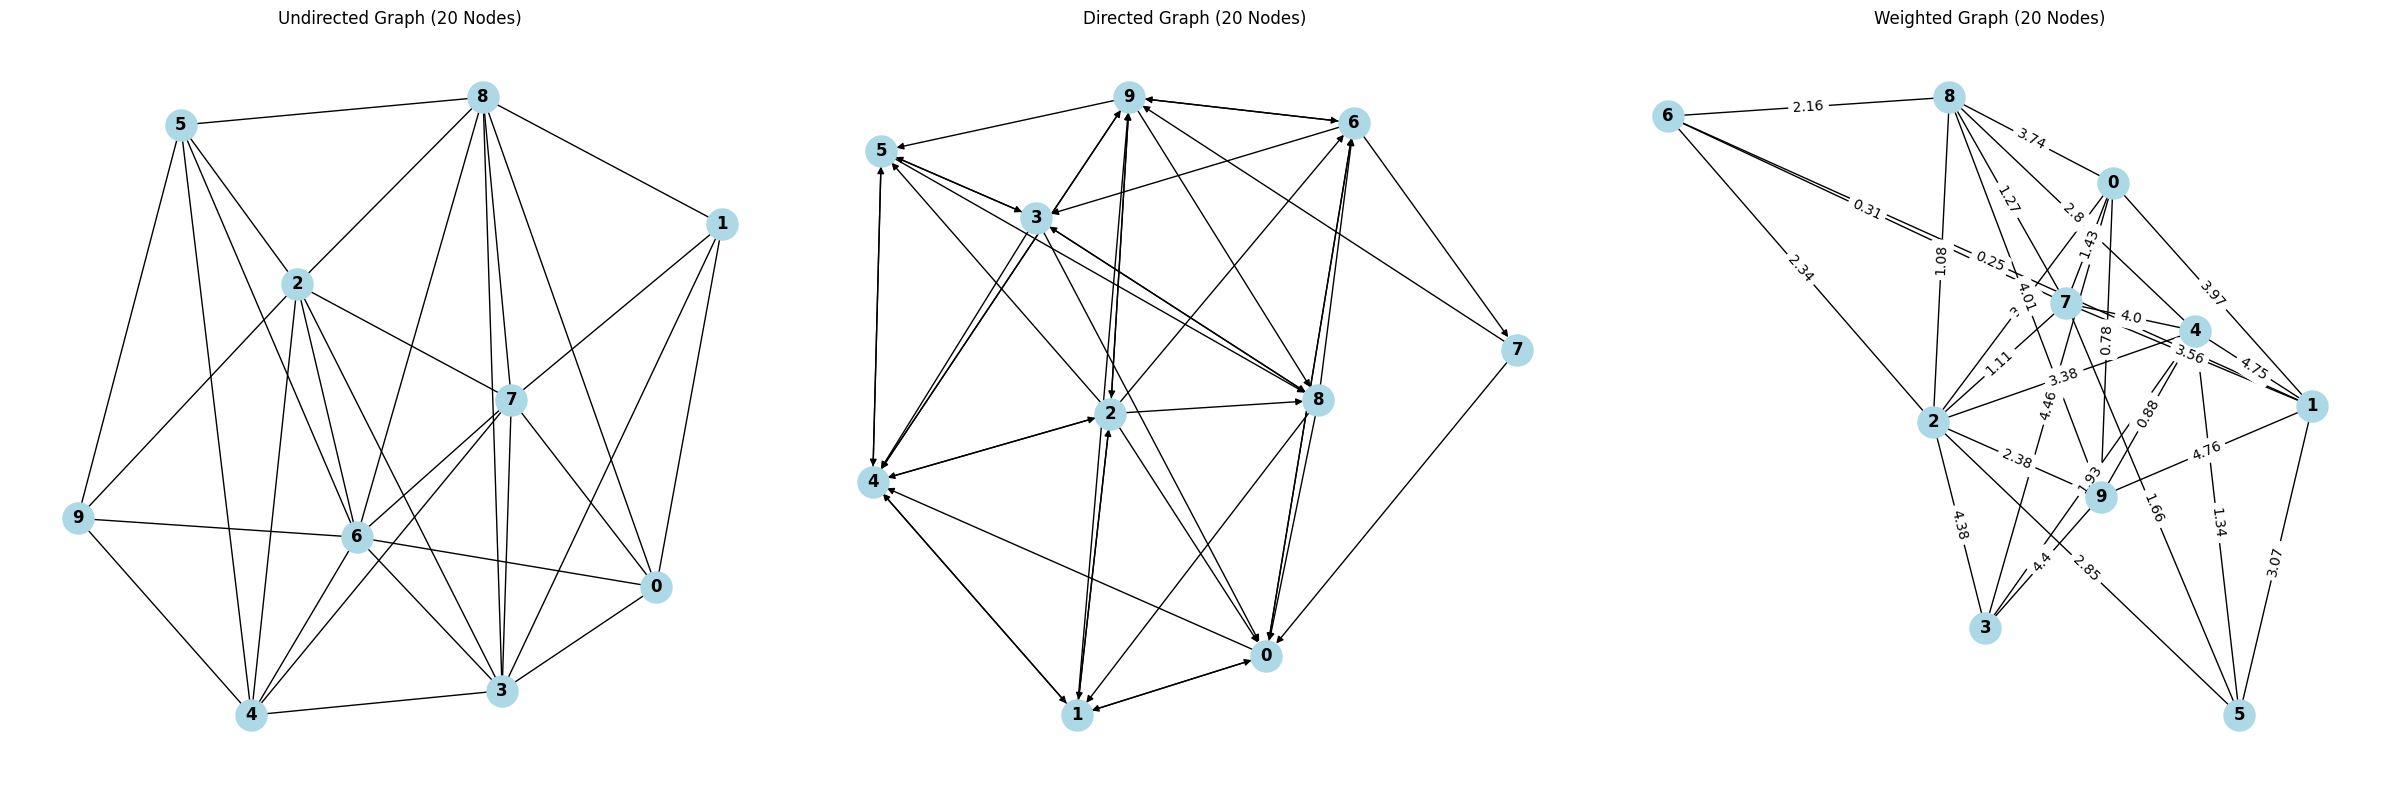

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import random

class Graph:
    def __init__(self, nodes, edges, directed=False, weighted=False):
        self.nodes = nodes
        self.num_nodes = len(nodes)
        self.directed = directed
        self.weighted = weighted
        self.adj_matrix = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for edge in edges:
            if self.weighted:
                u, v, weight = edge
                self.adj_matrix[u][v] = weight
                if not directed:
                    self.adj_matrix[v][u] = weight
            else:
                u, v = edge
                self.adj_matrix[u][v] = 1
                if not directed:
                    self.adj_matrix[v][u] = 1

    def display_adj_matrix(self):
        print("Adjacency Matrix:")
        print(self.adj_matrix)

    def degree(self):
        if self.directed:
            in_degree = np.sum(self.adj_matrix, axis=0)
            out_degree = np.sum(self.adj_matrix, axis=1)
            return in_degree, out_degree
        else:
            return np.sum(self.adj_matrix, axis=1)

    def mean_path_length(self):
        dist_matrix = self.floyd_warshall()
        finite_dists = dist_matrix[dist_matrix < float('inf')]
        return np.sum(finite_dists) / len(finite_dists)

    def floyd_warshall(self):
        dist = np.copy(self.adj_matrix)
        dist[dist == 0] = float('inf')  # Treat non-edges as infinite distance
        np.fill_diagonal(dist, 0)  # Distance to self is zero
        for k in range(self.num_nodes):
            for i in range(self.num_nodes):
                for j in range(self.num_nodes):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
        return dist

    def clustering_coefficient(self):
        coeffs = []
        for i in range(self.num_nodes):
            neighbors = np.where(self.adj_matrix[i] > 0)[0]
            k = len(neighbors)
            if k < 2:
                coeffs.append(0)
            else:
                links = sum(self.adj_matrix[u][v] > 0 for u, v in combinations(neighbors, 2))
                coeffs.append(2 * links / (k * (k - 1)))
        return np.mean(coeffs)

    def transitivity(self):
        triangles = 0
        triples = 0
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                for k in range(j + 1, self.num_nodes):
                    if self.adj_matrix[i][j] > 0 and self.adj_matrix[j][k] > 0 and self.adj_matrix[k][i] > 0:
                        triangles += 1
                    if self.adj_matrix[i][j] > 0 or self.adj_matrix[j][k] > 0 or self.adj_matrix[k][i] > 0:
                        triples += 1
        return triangles / triples if triples > 0 else 0


# Create random graphs with more nodes and edges
def generate_random_edges(num_nodes, num_edges, weighted=False):
    edges = set()
    while len(edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:  # Avoid self-loops
            if weighted:
                weight = round(random.uniform(0.1, 5.0), 2)
                edges.add((u, v, weight))
            else:
                edges.add((u, v))
    return list(edges)


num_nodes = 10
nodes = list(range(num_nodes))

# Generate random edges for each graph type
edges_undirected = generate_random_edges(num_nodes, 40)
edges_directed = generate_random_edges(num_nodes, 40)
edges_weighted = generate_random_edges(num_nodes, 40, weighted=True)

# Instantiate graphs
G_undirected = Graph(nodes, edges_undirected)
G_directed = Graph(nodes, edges_directed, directed=True)
G_weighted = Graph(nodes, edges_weighted, weighted=True)

# Visualization using NetworkX
def visualize_with_networkx(graph, ax, title):
    nx_graph = nx.DiGraph() if graph.directed else nx.Graph()
    adj_matrix = graph.adj_matrix

    # Add edges based on the adjacency matrix
    for i in range(graph.num_nodes):
        for j in range(graph.num_nodes):
            if adj_matrix[i][j] > 0:
                if graph.weighted:
                    nx_graph.add_edge(i, j, weight=adj_matrix[i][j])
                else:
                    nx_graph.add_edge(i, j)

    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, ax=ax, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
    if graph.weighted:
        labels = nx.get_edge_attributes(nx_graph, 'weight')
        nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=labels, ax=ax)
    ax.set_title(title)


# Display properties and visualize graphs
def analyze_and_visualize(graph, title, ax):
    print(f"\n{title}")
    graph.display_adj_matrix()
    if graph.directed:
        in_degree, out_degree = graph.degree()
        print("In-Degree:", in_degree)
        print("Out-Degree:", out_degree)
    else:
        print("Degree:", graph.degree())
    print("Mean Path Length:", graph.mean_path_length())
    print("Clustering Coefficient:", graph.clustering_coefficient())
    print("Transitivity:", graph.transitivity())

    visualize_with_networkx(graph, ax, title)


# Create a large plot with smaller subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

analyze_and_visualize(G_undirected, "Undirected Graph (20 Nodes)", axs[0])
analyze_and_visualize(G_directed, "Directed Graph (20 Nodes)", axs[1])
analyze_and_visualize(G_weighted, "Weighted Graph (20 Nodes)", axs[2])

plt.tight_layout()
plt.show()



Undirected Graph (20 Nodes)
Adjacency Matrix:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 

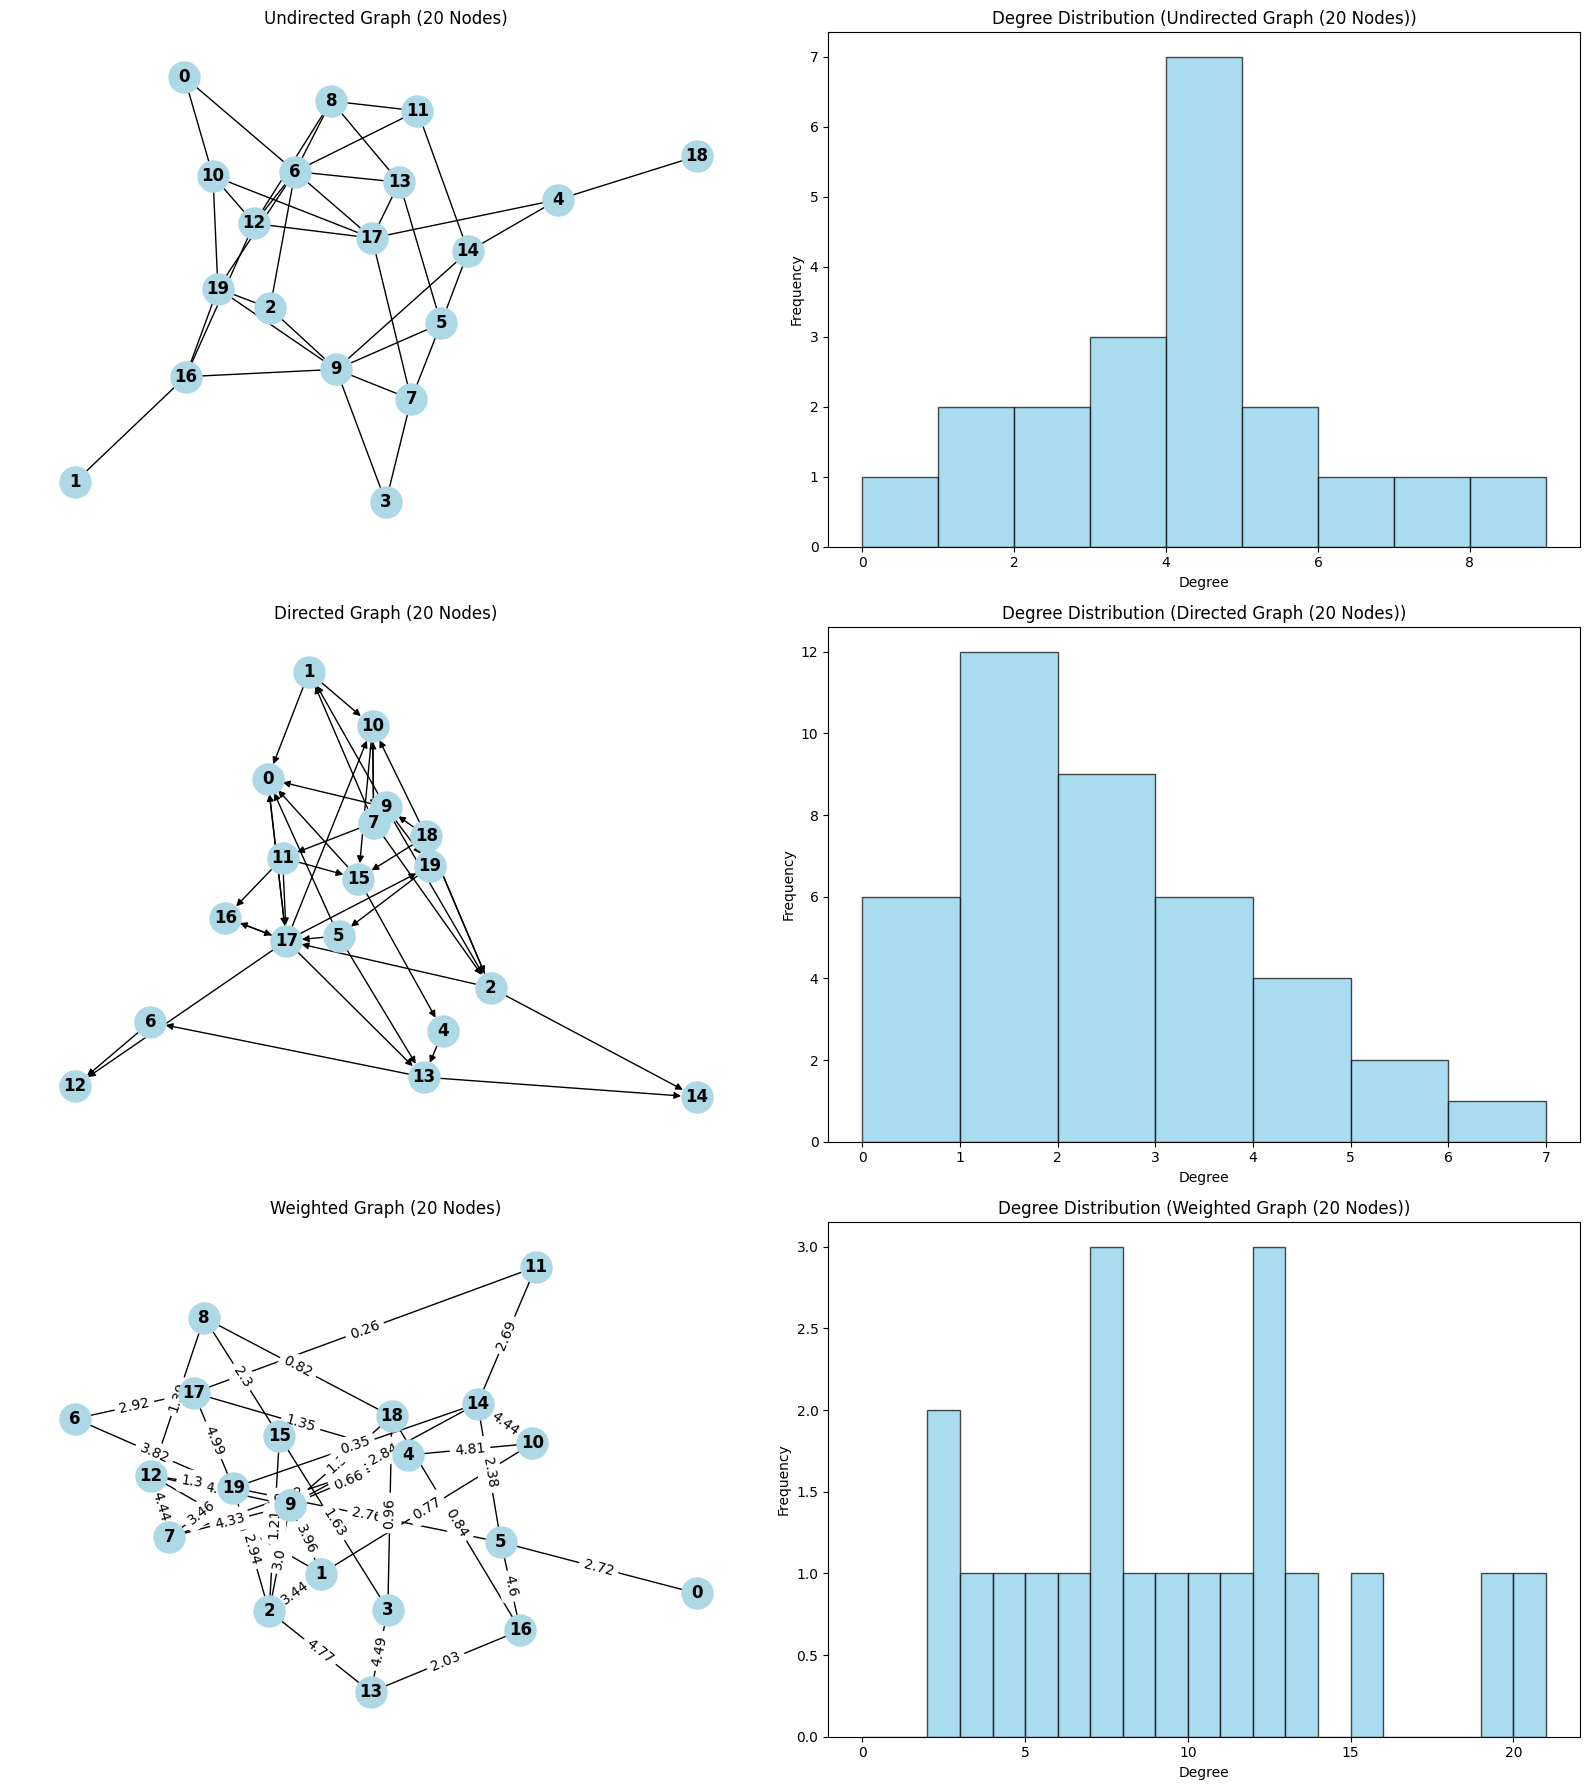

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import random

class Graph:
    def __init__(self, nodes, edges, directed=False, weighted=False):
        self.nodes = nodes
        self.num_nodes = len(nodes)
        self.directed = directed
        self.weighted = weighted
        self.adj_matrix = np.zeros((self.num_nodes, self.num_nodes), dtype=float)
        for edge in edges:
            if self.weighted:
                u, v, weight = edge
                self.adj_matrix[u][v] = weight
                if not directed:
                    self.adj_matrix[v][u] = weight
            else:
                u, v = edge
                self.adj_matrix[u][v] = 1
                if not directed:
                    self.adj_matrix[v][u] = 1

    def display_adj_matrix(self):
        print("Adjacency Matrix:")
        print(self.adj_matrix)

    def degree(self):
        if self.directed:
            in_degree = np.sum(self.adj_matrix, axis=0)
            out_degree = np.sum(self.adj_matrix, axis=1)
            return in_degree, out_degree
        else:
            return np.sum(self.adj_matrix, axis=1)

    def mean_path_length(self):
        dist_matrix = self.floyd_warshall()
        finite_dists = dist_matrix[dist_matrix < float('inf')]
        return np.sum(finite_dists) / len(finite_dists)

    def floyd_warshall(self):
        dist = np.copy(self.adj_matrix)
        dist[dist == 0] = float('inf')  # Treat non-edges as infinite distance
        np.fill_diagonal(dist, 0)  # Distance to self is zero
        for k in range(self.num_nodes):
            for i in range(self.num_nodes):
                for j in range(self.num_nodes):
                    dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
        return dist

    def clustering_coefficient(self):
        coeffs = []
        for i in range(self.num_nodes):
            neighbors = np.where(self.adj_matrix[i] > 0)[0]
            k = len(neighbors)
            if k < 2:
                coeffs.append(0)
            else:
                links = sum(self.adj_matrix[u][v] > 0 for u, v in combinations(neighbors, 2))
                coeffs.append(2 * links / (k * (k - 1)))
        return np.mean(coeffs)

    def transitivity(self):
        triangles = 0
        triples = 0
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                for k in range(j + 1, self.num_nodes):
                    if self.adj_matrix[i][j] > 0 and self.adj_matrix[j][k] > 0 and self.adj_matrix[k][i] > 0:
                        triangles += 1
                    if self.adj_matrix[i][j] > 0 or self.adj_matrix[j][k] > 0 or self.adj_matrix[k][i] > 0:
                        triples += 1
        return triangles / triples if triples > 0 else 0


# Create random graphs with more nodes and edges
def generate_random_edges(num_nodes, num_edges, weighted=False):
    edges = set()
    while len(edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:  # Avoid self-loops
            if weighted:
                weight = round(random.uniform(0.1, 5.0), 2)
                edges.add((u, v, weight))
            else:
                edges.add((u, v))
    return list(edges)


num_nodes = 20
nodes = list(range(num_nodes))

# Generate random edges for each graph type
edges_undirected = generate_random_edges(num_nodes, 40)
edges_directed = generate_random_edges(num_nodes, 40)
edges_weighted = generate_random_edges(num_nodes, 40, weighted=True)

# Instantiate graphs
G_undirected = Graph(nodes, edges_undirected)
G_directed = Graph(nodes, edges_directed, directed=True)
G_weighted = Graph(nodes, edges_weighted, weighted=True)

# Visualization using NetworkX
def visualize_with_networkx(graph, ax, title):
    nx_graph = nx.DiGraph() if graph.directed else nx.Graph()
    adj_matrix = graph.adj_matrix

    # Add edges based on the adjacency matrix
    for i in range(graph.num_nodes):
        for j in range(graph.num_nodes):
            if adj_matrix[i][j] > 0:
                if graph.weighted:
                    nx_graph.add_edge(i, j, weight=adj_matrix[i][j])
                else:
                    nx_graph.add_edge(i, j)

    pos = nx.spring_layout(nx_graph)
    nx.draw(nx_graph, pos, ax=ax, with_labels=True, node_color='lightblue', font_weight='bold', node_size=500)
    if graph.weighted:
        labels = nx.get_edge_attributes(nx_graph, 'weight')
        nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=labels, ax=ax)
    ax.set_title(title)


# Display properties and visualize graphs
def analyze_and_visualize(graph, title, axs):
    print(f"\n{title}")
    graph.display_adj_matrix()
    if graph.directed:
        in_degree, out_degree = graph.degree()
        print("In-Degree:", in_degree)
        print("Out-Degree:", out_degree)
        degrees = np.concatenate([in_degree, out_degree])
    else:
        degrees = graph.degree()
        print("Degree:", degrees)

    print("Mean Path Length:", graph.mean_path_length())
    print("Clustering Coefficient:", graph.clustering_coefficient())
    print("Transitivity:", graph.transitivity())

    # Plot the graph visualization
    visualize_with_networkx(graph, axs[0], title)

    # Plot the degree distribution
    axs[1].hist(degrees, bins=range(int(max(degrees)) + 2), color='skyblue', edgecolor='black', alpha=0.7)
    axs[1].set_title(f"Degree Distribution ({title})")
    axs[1].set_xlabel("Degree")
    axs[1].set_ylabel("Frequency")


# Create a plot with subplots for each graph
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

analyze_and_visualize(G_undirected, "Undirected Graph (20 Nodes)", axes[0])
analyze_and_visualize(G_directed, "Directed Graph (20 Nodes)", axes[1])
analyze_and_visualize(G_weighted, "Weighted Graph (20 Nodes)", axes[2])

plt.tight_layout()
plt.show()


Adjacency Matrix:
[[0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1

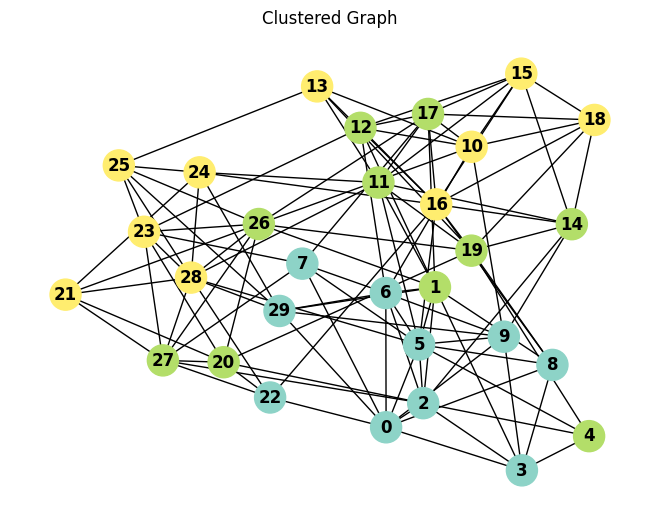

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random


class Graph:
    def __init__(self, num_nodes, clusters, inter_cluster_prob=0.1, intra_cluster_prob=0.8):
        self.num_nodes = num_nodes
        self.adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
        self.clusters = clusters
        self.cluster_assignments = self._assign_clusters()
        self._generate_clustered_graph(inter_cluster_prob, intra_cluster_prob)

    def _assign_clusters(self):
        # Assign nodes to clusters
        cluster_assignments = {}
        node_counter = 0
        for cluster_idx, size in enumerate(self.clusters):
            for _ in range(size):
                cluster_assignments[node_counter] = cluster_idx
                node_counter += 1
        return cluster_assignments

    def _generate_clustered_graph(self, inter_prob, intra_prob):
        # Generate edges with higher probability within clusters
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                if self.cluster_assignments[i] == self.cluster_assignments[j]:
                    # Nodes belong to the same cluster
                    if random.random() < intra_prob:
                        self.adj_matrix[i][j] = 1
                        self.adj_matrix[j][i] = 1
                else:
                    # Nodes belong to different clusters
                    if random.random() < inter_prob:
                        self.adj_matrix[i][j] = 1
                        self.adj_matrix[j][i] = 1

    def display_adj_matrix(self):
        print("Adjacency Matrix:")
        print(self.adj_matrix)

    def visualize(self):
        # Use NetworkX for visualization
        G = nx.Graph()
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                if self.adj_matrix[i][j] == 1:
                    G.add_edge(i, j)

        # Assign colors to clusters
        cluster_colors = [self.cluster_assignments[i] for i in range(self.num_nodes)]
        pos = nx.spring_layout(G, seed=42)
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_color=cluster_colors,
            cmap=plt.cm.Set3,
            node_size=500,
            font_weight="bold",
        )
        plt.title("Clustered Graph")
        plt.show()


# Configuration for clustering
num_nodes = 30
clusters = [10, 10, 10]  # Define cluster sizes
inter_cluster_prob = 0.1  # Probability of edges between clusters
intra_cluster_prob = 0.5  # Probability of edges within clusters

# Create and visualize the clustered graph
clustered_graph = Graph(num_nodes, clusters, inter_cluster_prob, intra_cluster_prob)
clustered_graph.display_adj_matrix()
clustered_graph.visualize()


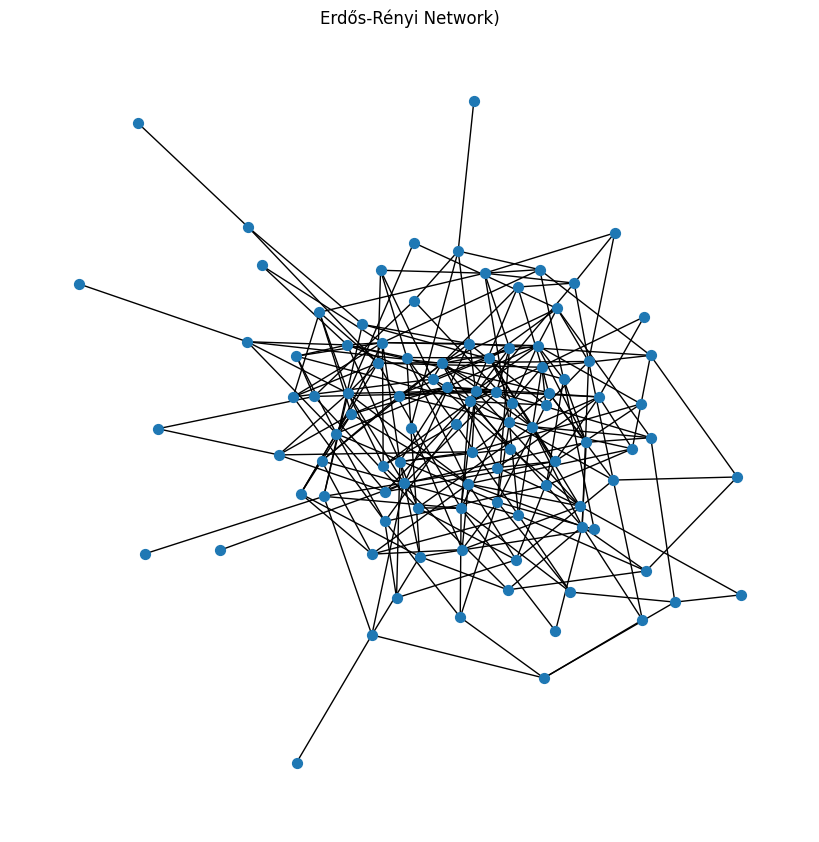

Number of Nodes (N): 100
Edge Probability (p): 0.05
Average Degree: 5.28
Degree Variance: 5.72
Average Path Length: 2.914656771799629


In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
N = 100  # Number of nodes
p = 0.05  # Probability of edge creation

# Step 1: Initialize adjacency matrix
adj_matrix = [[0] * N for _ in range(N)]

# Step 2: Add edges with probability p
edges = []
for i in range(N):
    for j in range(i + 1, N):  # Only upper triangle for undirected graph
        if random.random() < p:
            adj_matrix[i][j] = 1
            adj_matrix[j][i] = 1  # Mirror edge for undirected graph
            edges.append((i, j))

# Step 3: Compute degree distribution
degrees = [sum(row) for row in adj_matrix]  # Degree = sum of connections in a row
average_degree = np.mean(degrees)
variance_degree = np.var(degrees)

# Step 4: Compute average path length
def bfs_shortest_path_length(start, adj_matrix):
    """Perform BFS to calculate shortest path lengths from a start node."""
    visited = [False] * N
    distances = [-1] * N  # -1 indicates unvisited nodes
    queue = [start]
    visited[start] = True
    distances[start] = 0
    
    while queue:
        current = queue.pop(0)
        for neighbor in range(N):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)
    return distances

# Calculate shortest paths
path_lengths = []
for i in range(N):
    distances = bfs_shortest_path_length(i, adj_matrix)
    path_lengths.extend([d for d in distances if d > 0])  # Only include valid paths

average_path_length = np.mean(path_lengths) if path_lengths else "Graph not connected"

# Step 5: Visualize using NetworkX
G = nx.Graph()
G.add_edges_from(edges)  # Add edges from step 2

plt.figure(figsize=(8, 8))
nx.draw(G, node_size=50, with_labels=False)
plt.title("Erdős-Rényi Network)")
plt.show()

# Print results
print(f"Number of Nodes (N): {N}")
print(f"Edge Probability (p): {p}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Degree Variance: {variance_degree:.2f}")
print(f"Average Path Length: {average_path_length}")


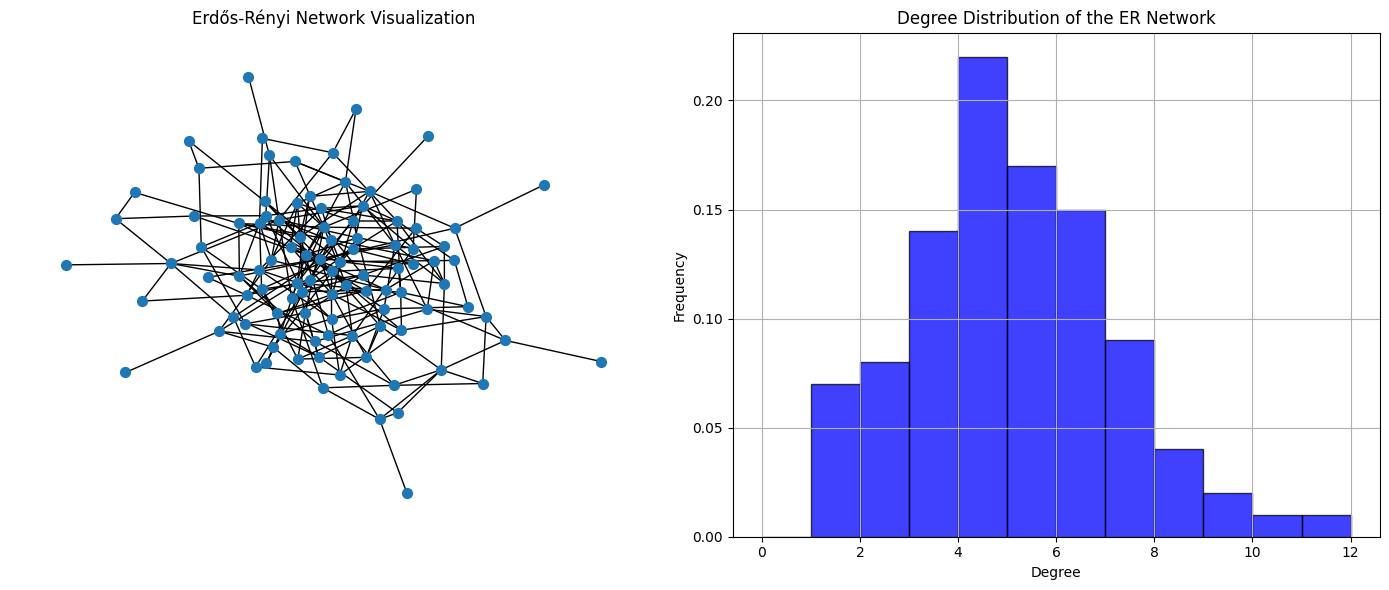

Number of Nodes (N): 100
Edge Probability (p): 0.05
Average Degree: 4.62
Degree Variance: 4.28
Average Path Length: 3.156767676767677


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
N = 100  # Number of nodes
p = 0.05  # Probability of edge creation

# Step 1: Initialize adjacency matrix
adj_matrix = [[0] * N for _ in range(N)]

# Step 2: Add edges with probability p
edges = []
for i in range(N):
    for j in range(i + 1, N):  # Only upper triangle for undirected graph
        if random.random() < p:
            adj_matrix[i][j] = 1
            adj_matrix[j][i] = 1  # Mirror edge for undirected graph
            edges.append((i, j))

# Step 3: Compute degree distribution
degrees = [sum(row) for row in adj_matrix]  # Degree = sum of connections in a row
average_degree = np.mean(degrees)
variance_degree = np.var(degrees)

# Step 4: Compute average path length
def bfs_shortest_path_length(start, adj_matrix):
    """Perform BFS to calculate shortest path lengths from a start node."""
    visited = [False] * N
    distances = [-1] * N  # -1 indicates unvisited nodes
    queue = [start]
    visited[start] = True
    distances[start] = 0
    
    while queue:
        current = queue.pop(0)
        for neighbor in range(N):
            if adj_matrix[current][neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)
    return distances

# Calculate shortest paths
path_lengths = []
for i in range(N):
    distances = bfs_shortest_path_length(i, adj_matrix)
    path_lengths.extend([d for d in distances if d > 0])  # Only include valid paths

average_path_length = np.mean(path_lengths) if path_lengths else "Graph not connected"

# Step 5: Visualize using NetworkX
G = nx.Graph()
G.add_edges_from(edges)  # Add edges from step 2


fig, ax = plt.subplots(1, 2, figsize=(14, 6))


nx.draw(G, ax=ax[0], node_size=50, with_labels=False)
ax[0].set_title("Erdős-Rényi Network Visualization")


ax[1].hist(degrees, bins=range(max(degrees) + 2), density=True, alpha=0.75, color='b', edgecolor='black')
ax[1].set_title("Degree Distribution of the ER Network")
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("Frequency")
ax[1].grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()

# Print results
print(f"Number of Nodes (N): {N}")
print(f"Edge Probability (p): {p}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Degree Variance: {variance_degree:.2f}")
print(f"Average Path Length: {average_path_length}")


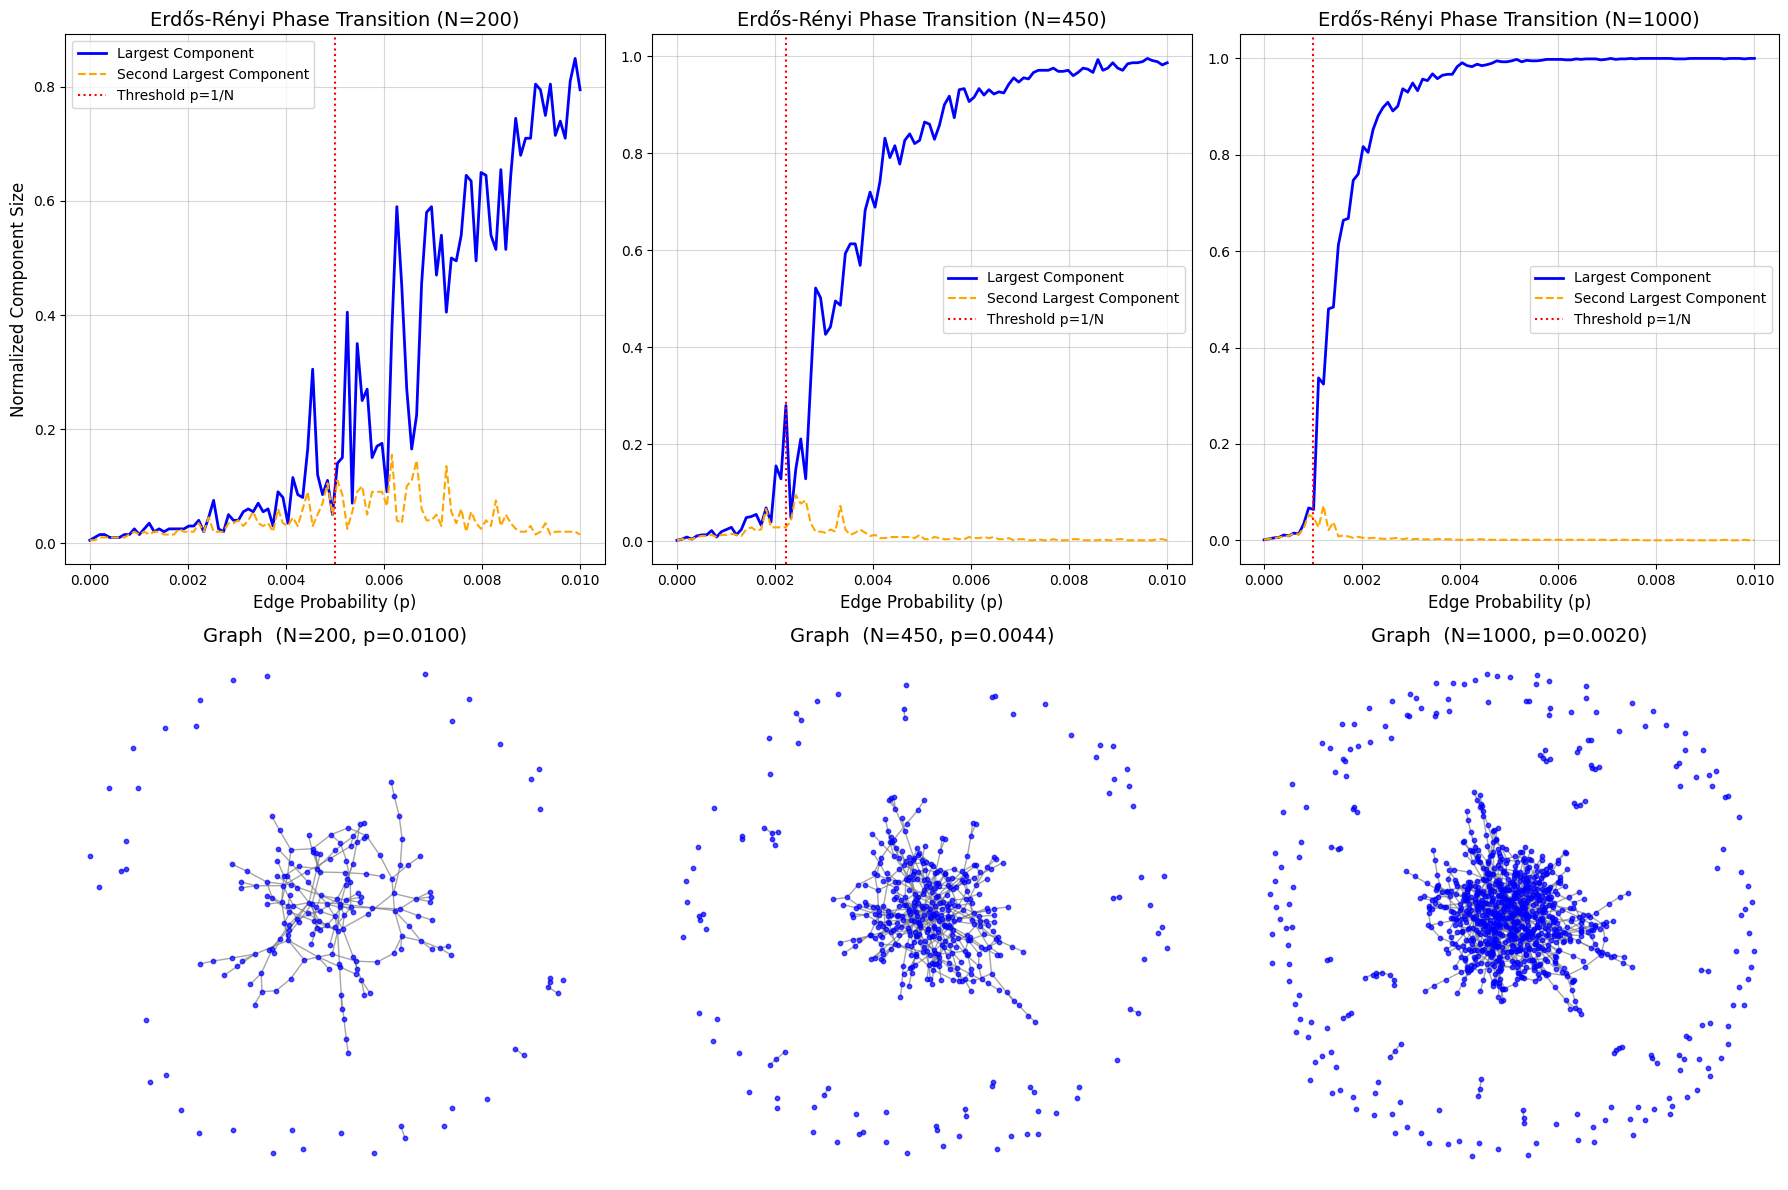

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def simulate_er_network(N, p_values):
    """Simulates an Erdős-Rényi random graph for a range of p values and calculates largest component sizes."""
    largest_component_sizes = []
    second_largest_component_sizes = []

    for p in p_values:
        # Generate Erdős-Rényi graph
        G = nx.erdos_renyi_graph(N, p)
        
        # Find sizes of all connected components
        component_sizes = [len(c) for c in nx.connected_components(G)]
        
        # Sort component sizes in descending order
        component_sizes.sort(reverse=True)
        
        # Store largest and second-largest component sizes
        largest_component_sizes.append(component_sizes[0] if component_sizes else 0)
        second_largest_component_sizes.append(component_sizes[1] if len(component_sizes) > 1 else 0)
    
    # Normalize by N
    normalized_largest = [size / N for size in largest_component_sizes]
    normalized_second_largest = [size / N for size in second_largest_component_sizes]
    
    return normalized_largest, normalized_second_largest

# Parameters
N_values = [200, 450, 1000]  # Different values of N
p_values = np.linspace(0, 0.01, 100)  # Range of p values
thresholds = [1 / N for N in N_values]  # Theoretical thresholds (p = 1/N)

# Initialize the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12), gridspec_kw={"height_ratios": [1, 1]})

# Simulate for each N and plot
for i, (N, ax_plot, ax_graph) in enumerate(zip(N_values, axes[0], axes[1])):
    # Phase transition plots
    normalized_largest, normalized_second_largest = simulate_er_network(N, p_values)
    
    # Plot largest component size
    ax_plot.plot(p_values, normalized_largest, label="Largest Component", color="blue", linewidth=2)
    
    # Plot second-largest component size
    ax_plot.plot(p_values, normalized_second_largest, label="Second Largest Component", color="orange", linestyle="--")
    
    # Threshold marker
    ax_plot.axvline(thresholds[i], color="red", linestyle=":", label=f"Threshold p=1/N")
    
    # Titles and labels for the phase transition plot
    ax_plot.set_title(f"Erdős-Rényi Phase Transition (N={N})", fontsize=14)
    ax_plot.set_xlabel("Edge Probability (p)", fontsize=12)
    if i == 0:  # Add y-axis label to the first plot only
        ax_plot.set_ylabel("Normalized Component Size", fontsize=12)
    ax_plot.legend(fontsize=10)
    ax_plot.grid(alpha=0.5)

    # Graph visualization
    p_graph = 2 / N  # Choose p slightly above the threshold
    G_graph = nx.erdos_renyi_graph(N, p_graph)
    
    nx.draw_spring(
        G_graph, 
        ax=ax_graph, 
        node_size=10, 
        edge_color="gray", 
        node_color="blue", 
        alpha=0.7
    )
    ax_graph.set_title(f"Graph  (N={N}, p={p_graph:.4f})", fontsize=14)

# Adjust layout and show
plt.tight_layout()
plt.show()


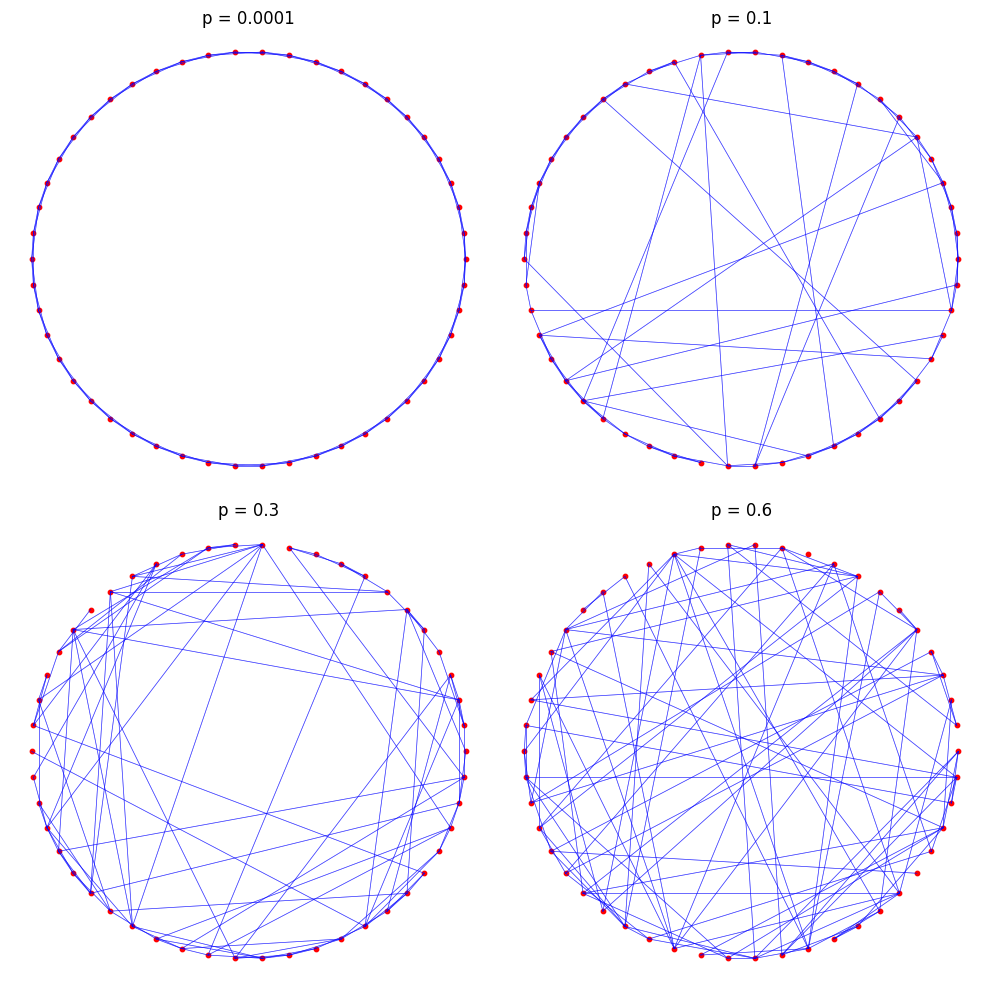

In [7]:
import random
import matplotlib.pyplot as plt
import math

def create_ring_lattice(n, k):
    """
    Create a ring lattice where each node connects to k nearest neighbors.
    """
    adjacency_list = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(1, k // 2 + 1):  # Connect to k/2 neighbors on each side
            adjacency_list[i].append((i + j) % n)  # Forward neighbor
            adjacency_list[i].append((i - j) % n)  # Backward neighbor
    return adjacency_list

def rewire_edges(adjacency_list, n, p):
    """
    Rewire edges with probability p.
    """
    for node in range(n):
        neighbors = list(adjacency_list[node])  # Make a copy to iterate over
        for neighbor in neighbors:
            if random.random() < p:  # Rewire with probability p
                # Remove the current connection
                adjacency_list[node].remove(neighbor)
                adjacency_list[neighbor].remove(node)

                # Add a new connection to a random node (avoiding duplicates and self-loops)
                new_neighbor = random.choice(
                    [i for i in range(n) if i != node and i not in adjacency_list[node]]
                )
                adjacency_list[node].append(new_neighbor)
                adjacency_list[new_neighbor].append(node)
    return adjacency_list

def plot_network(adjacency_list, n, p, ax):
    """
    Plot the network using Matplotlib.
    """
    theta = [2 * math.pi * i / n for i in range(n)]  # Angular positions of nodes
    x = [math.cos(t) for t in theta]
    y = [math.sin(t) for t in theta]

    # Draw edges
    for node, neighbors in adjacency_list.items():
        for neighbor in neighbors:
            ax.plot(
                [x[node], x[neighbor]],
                [y[node], y[neighbor]],
                color="blue",
                alpha=0.5,
                linewidth=0.5,
            )
    # Draw nodes
    ax.scatter(x, y, color="red", s=10)
    ax.set_title(f"p = {p}")
    ax.axis("off")

# Parameters
n = 50  # Number of nodes
k = 4   # Each node is connected to k nearest neighbors
p_values = [0.0001, 0.1, 0.3, 0.6]  # Different rewiring probabilities

# Create and visualize the small-world network for different p values
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, p in enumerate(p_values):
    adjacency_list = create_ring_lattice(n, k)
    adjacency_list = rewire_edges(adjacency_list, n, p)
    plot_network(adjacency_list, n, p, axs[i // 2, i % 2])

plt.tight_layout()
plt.show()


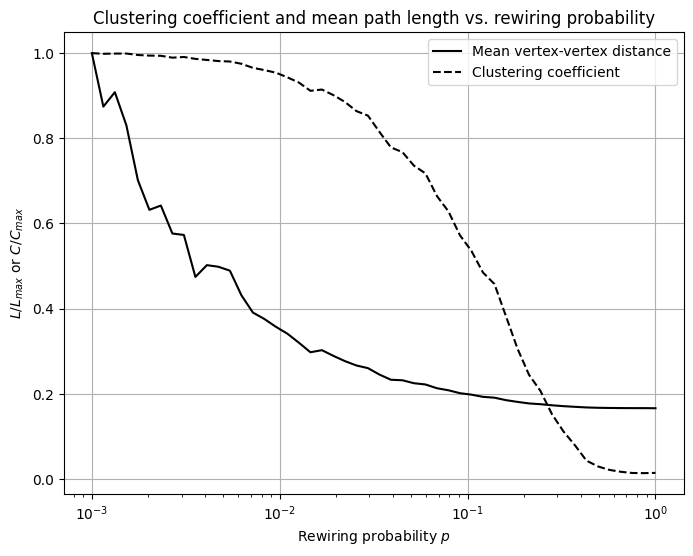

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def create_ring_lattice(n, k):
    """
    Create a ring lattice with n nodes where each node is connected to its k nearest neighbors.
    """
    graph = {i: set() for i in range(n)}
    for i in range(n):
        for j in range(1, k // 2 + 1):
            graph[i].add((i + j) % n)
            graph[i].add((i - j) % n)
    return graph

def rewire_edges(graph, p, n):
    """
    Rewire edges of the graph with probability p.
    """
    for i in range(n):
        neighbors = list(graph[i])
        for neighbor in neighbors:
            if np.random.rand() < p:
                # Remove the edge
                graph[i].remove(neighbor)
                graph[neighbor].remove(i)
                
                # Add a new edge
                new_neighbor = np.random.choice(list(set(range(n)) - {i} - graph[i]))
                graph[i].add(new_neighbor)
                graph[new_neighbor].add(i)
    return graph

def clustering_coefficient(graph, n):
    """
    Compute the clustering coefficient of the graph.
    """
    def local_clustering(v):
        neighbors = list(graph[v])
        k = len(neighbors)
        if k < 2:
            return 0
        edges = 0
        for i in range(k):
            for j in range(i + 1, k):
                if neighbors[j] in graph[neighbors[i]]:
                    edges += 1
        return 2 * edges / (k * (k - 1))
    
    return np.mean([local_clustering(v) for v in range(n)])

def mean_shortest_path_length(graph, n):
    """
    Compute the mean shortest path length of the graph using BFS.
    """
    def bfs(source):
        visited = [-1] * n
        visited[source] = 0
        queue = [source]
        for v in queue:
            for neighbor in graph[v]:
                if visited[neighbor] == -1:
                    visited[neighbor] = visited[v] + 1
                    queue.append(neighbor)
        return [v for v in visited if v != -1]

    total_path_length = 0
    for v in range(n):
        distances = bfs(v)
        total_path_length += sum(distances)
    return total_path_length / (n * (n - 1))

# Parameters
n = 1000  # Number of nodes
k = 10    # Each node is connected to k nearest neighbors
p_values = np.logspace(-3, 0, 50)  # Rewiring probabilities

# Metrics
clustering_coefficients = []
mean_path_lengths = []

for p in p_values:
    graph = create_ring_lattice(n, k)
    graph = rewire_edges(graph, p, n)
    clustering_coefficients.append(clustering_coefficient(graph, n))
    mean_path_lengths.append(mean_shortest_path_length(graph, n))

# Normalize metrics
C_max = clustering_coefficients[0]
L_max = mean_path_lengths[0]
clustering_coefficients = [C / C_max for C in clustering_coefficients]
mean_path_lengths = [L / L_max for L in mean_path_lengths]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(p_values, mean_path_lengths, label='Mean vertex-vertex distance', color='black')
plt.plot(p_values, clustering_coefficients, '--', label='Clustering coefficient', color='black')
plt.xscale('log')
plt.xlabel('Rewiring probability $p$')
plt.ylabel('$L/L_{max}$ or $C/C_{max}$')
plt.legend()
plt.title('Clustering coefficient and mean path length vs. rewiring probability')
plt.grid(True)
plt.show()




Creating initial graph...


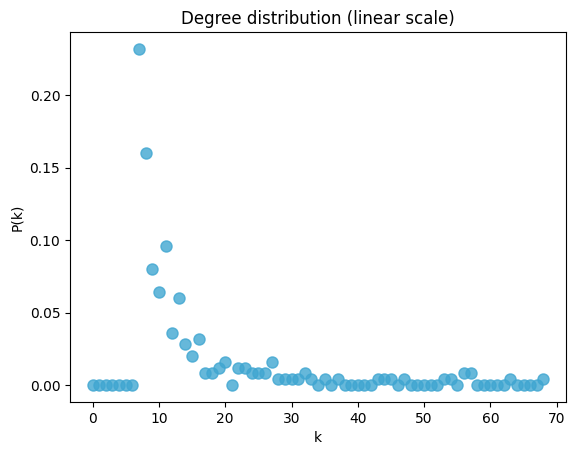

C:\Users\sutir\AppData\Local\Temp\ipykernel_20408\1530621111.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(w, z, 'k-', color='#7f7f7f')


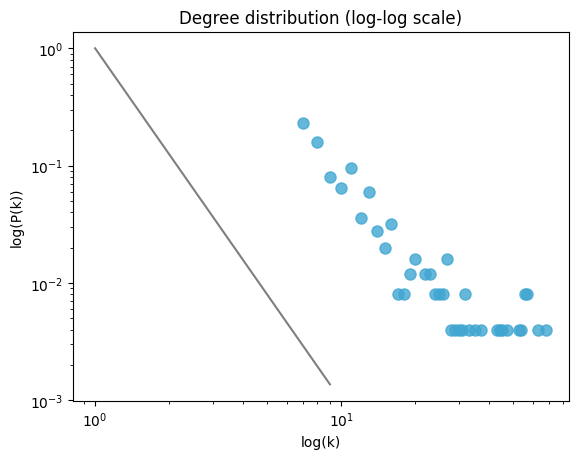

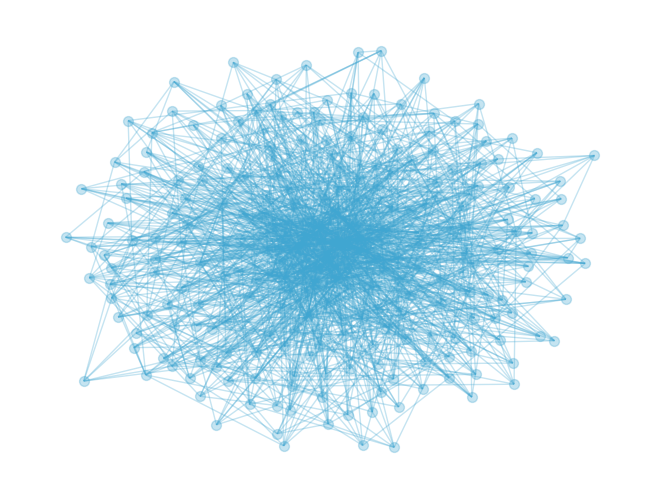

In [ ]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt
COLOR = '#40a6d1'
# Plotting

def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=True, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
           
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()



 # BA algo functions

def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        #print(node_degr)
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            
            add_edge()
        else:
           
            G.add_edge(new_node, random_proba_node)
            #print("Edge added: {} {}".format(new_node + 1, random_proba_node))


# Get parameters
init_nodes = int(input("Please type in the initial number of nodes (m_0): "))
final_nodes = int(input("\nPlease type in the final number of nodes: "))
m_parameter = int(input("\nPlease type in the value of m parameter (m<=m_0): "))

print("\n")
print("Creating initial graph...")

G = nx.complete_graph(init_nodes)



count = 0
new_node = init_nodes

for f in range(final_nodes - init_nodes):
    
    G.add_node(init_nodes + count)
   
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1
k_distrib(G), k_distrib(G, scale = 'log', fit_line = True)
# Plot the network
nx.draw(G, alpha = .3, edge_color = COLOR, node_color = COLOR, node_size=50)
              